In [71]:
from utilities import *
from astropy.io import fits
import matplotlib.pyplot as plt

def flatten(xss):
    return [x for xs in xss for x in xs if np.isfinite(x) or x > 0]

sources=['DSii','DSi','DSiv','DSVI']
c2h5oh_sourcelocs={'DSi':'/oct2024_1_removesDS2exclusions/','DSii':'/oct2024_1_removeproblemlines/',
                   'DSiii':'/nov2024_1_firstrun_removesDS2exclusions/',
                   'DSiv':'/nov2024_1_firstrun_removesDS2exclusions/','DSVI':'/nov2024_1_removesDS2exclusions/'}
ratiocutoff=0.05
plt.rcParams['figure.dpi'] = 300

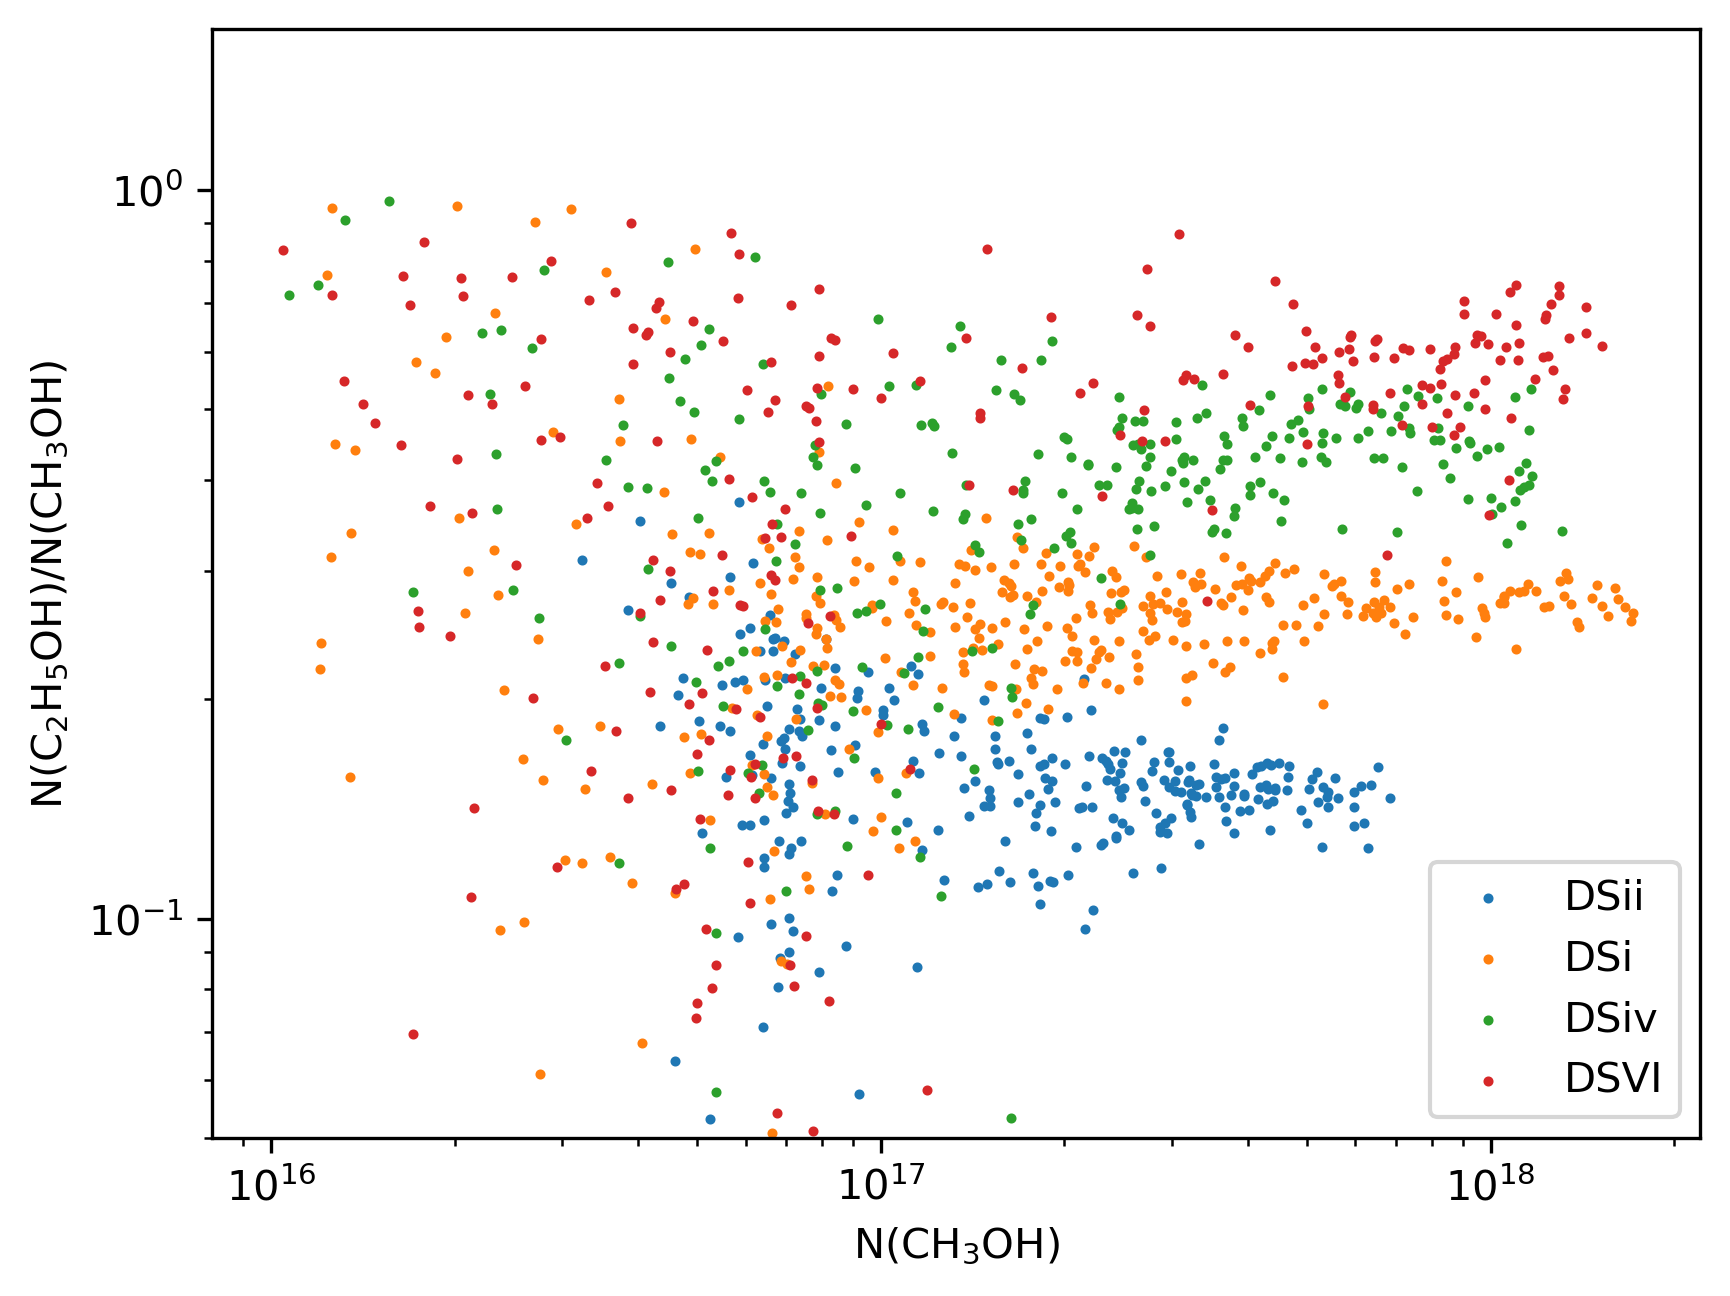

In [75]:
for source in sources:
    fnum=fields[source]
    center_pixel=pixdict[source]
    ch3oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/CH3OH/{source}{ch3oh_sourcedict[source]}'
    c2h5oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}{c2h5oh_sourcelocs[source]}'
    
    nch3oh_path=ch3oh_directory+'bootstrap_ntot_intstd_boostrap1000_nonegativeslope.fits'
    ratio_path=c2h5oh_directory+'nc2h5oh_nch3oh_ratio_3sigma_lessthan1.fits'
    nch3ohmap=np.squeeze(fits.getdata(nch3oh_path))
    ratiomap=fits.getdata(ratio_path)
    
    usable_nch3oh_pixels=(np.isfinite(nch3ohmap)*np.isfinite(ratiomap)) & (nch3ohmap > 1e16)
    usable_nch3ohmap=(nch3ohmap*usable_nch3oh_pixels)[(center_pixel[0]-5):(center_pixel[1]+5)]
    usable_ratiomap=ratiomap * (ratiomap > 0.05)
    plt.scatter(usable_nch3ohmap,ratiomap[(center_pixel[0]-5):(center_pixel[1]+5)],s=2,label=source)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'N(CH$_3$OH)')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)')
plt.ylim(ymin=ratiocutoff)
plt.legend()
plt.show()

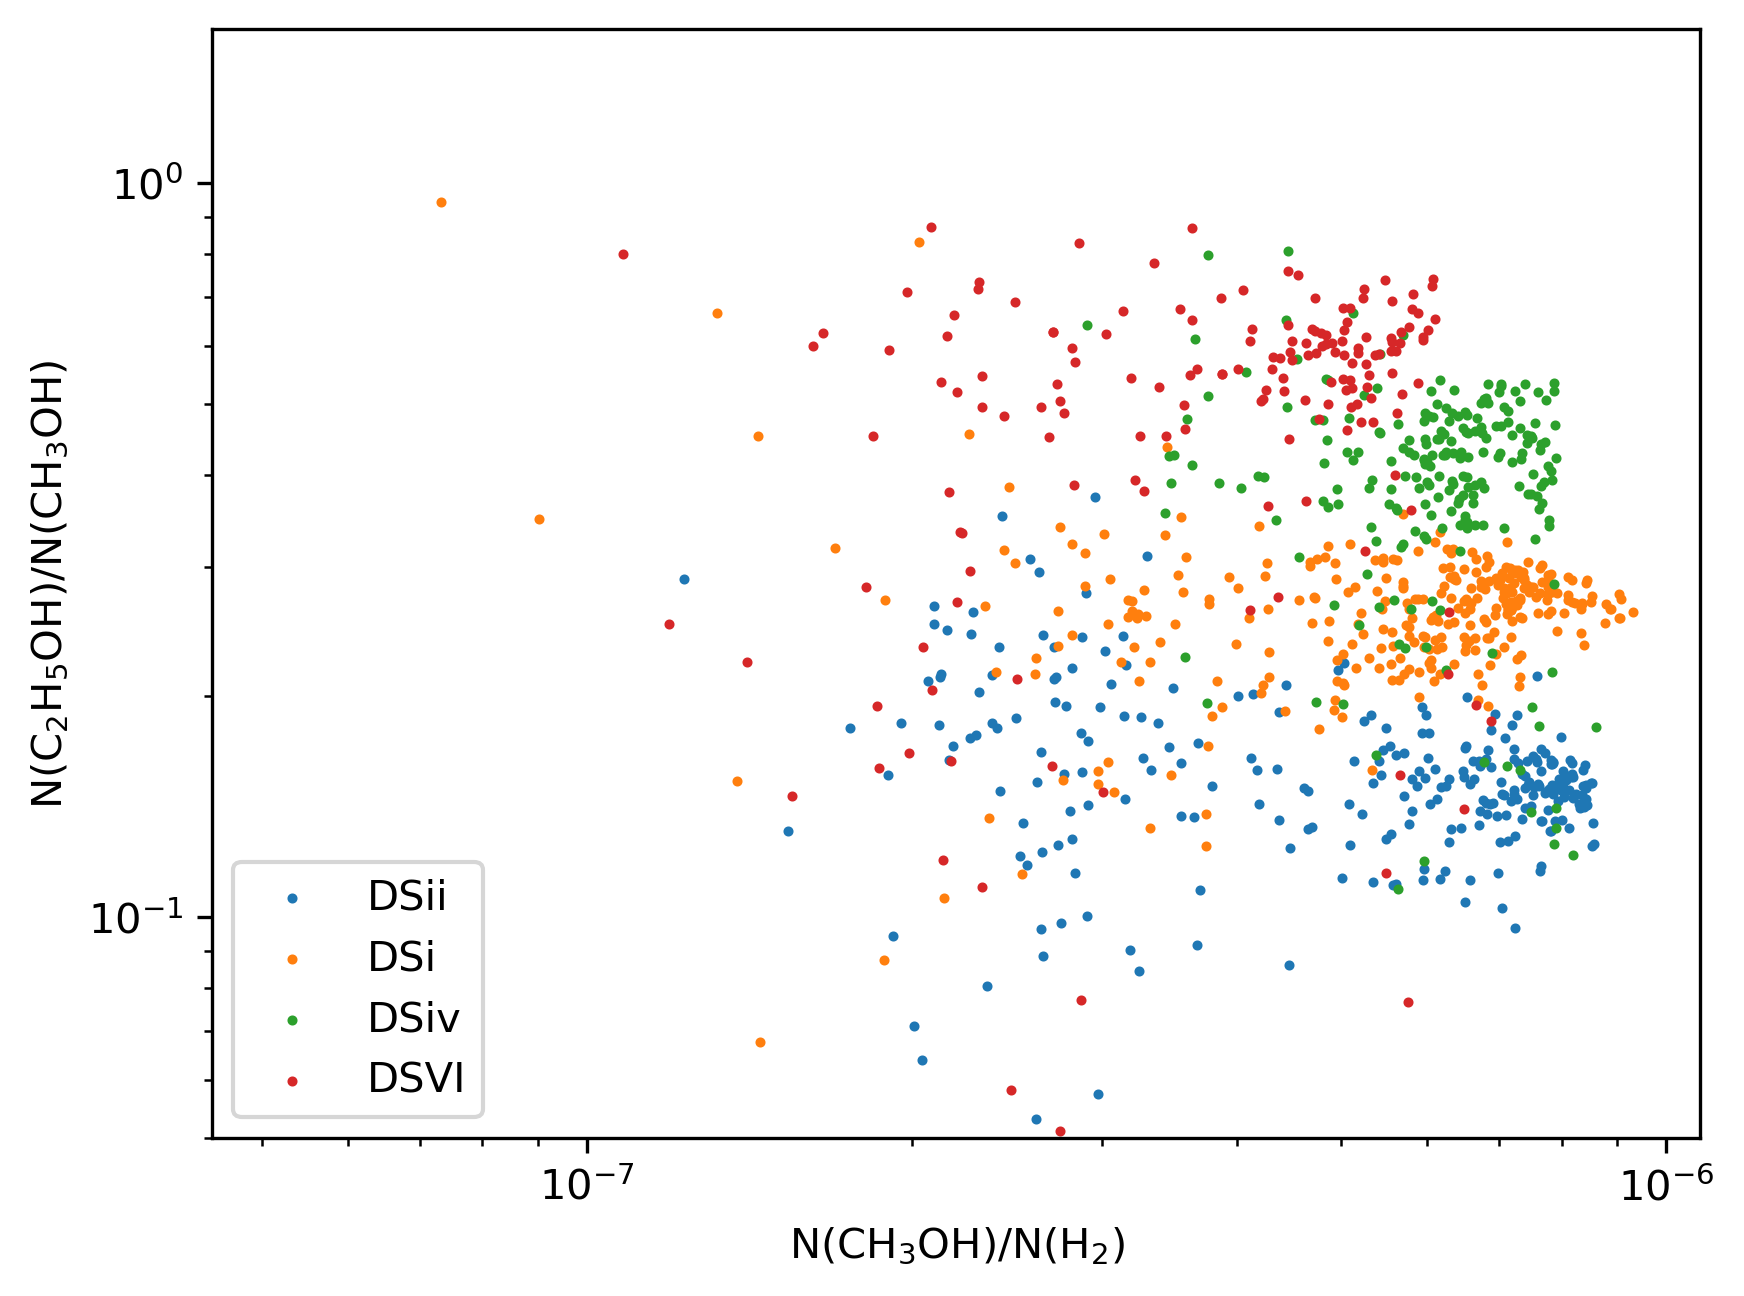

In [74]:
for source in sources:
    fnum=fields[source]
    center_pixel=pixdict[source]
    ch3oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/CH3OH/{source}{ch3oh_sourcedict[source]}'
    c2h5oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}{c2h5oh_sourcelocs[source]}'
    
    xch3oh_path=ch3oh_directory+'bootstrap_ch3ohabundance_3sigma_ntotintercept_bolocamfeather_smoothedtobolocam.fits'
    ratio_path=c2h5oh_directory+'nc2h5oh_nch3oh_ratio_3sigma_lessthan1.fits'
    xch3ohmap=np.squeeze(fits.getdata(xch3oh_path))
    ratiomap=fits.getdata(ratio_path)
    
    usable_xch3oh_pixels=(np.isfinite(xch3ohmap)*np.isfinite(ratiomap)) & (xch3ohmap > 0)
    usable_xch3ohmap=(xch3ohmap*usable_xch3oh_pixels)[(center_pixel[0]-5):(center_pixel[1]+5)]
    usable_ratiomap=ratiomap * (ratiomap > 0.01)
    plt.scatter(usable_xch3ohmap,ratiomap[(center_pixel[0]-5):(center_pixel[1]+5)],s=2,label=source)
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=ratiocutoff)
plt.xlabel(r'N(CH$_3$OH)/N(H$_2$)')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)')
plt.legend()
plt.show()

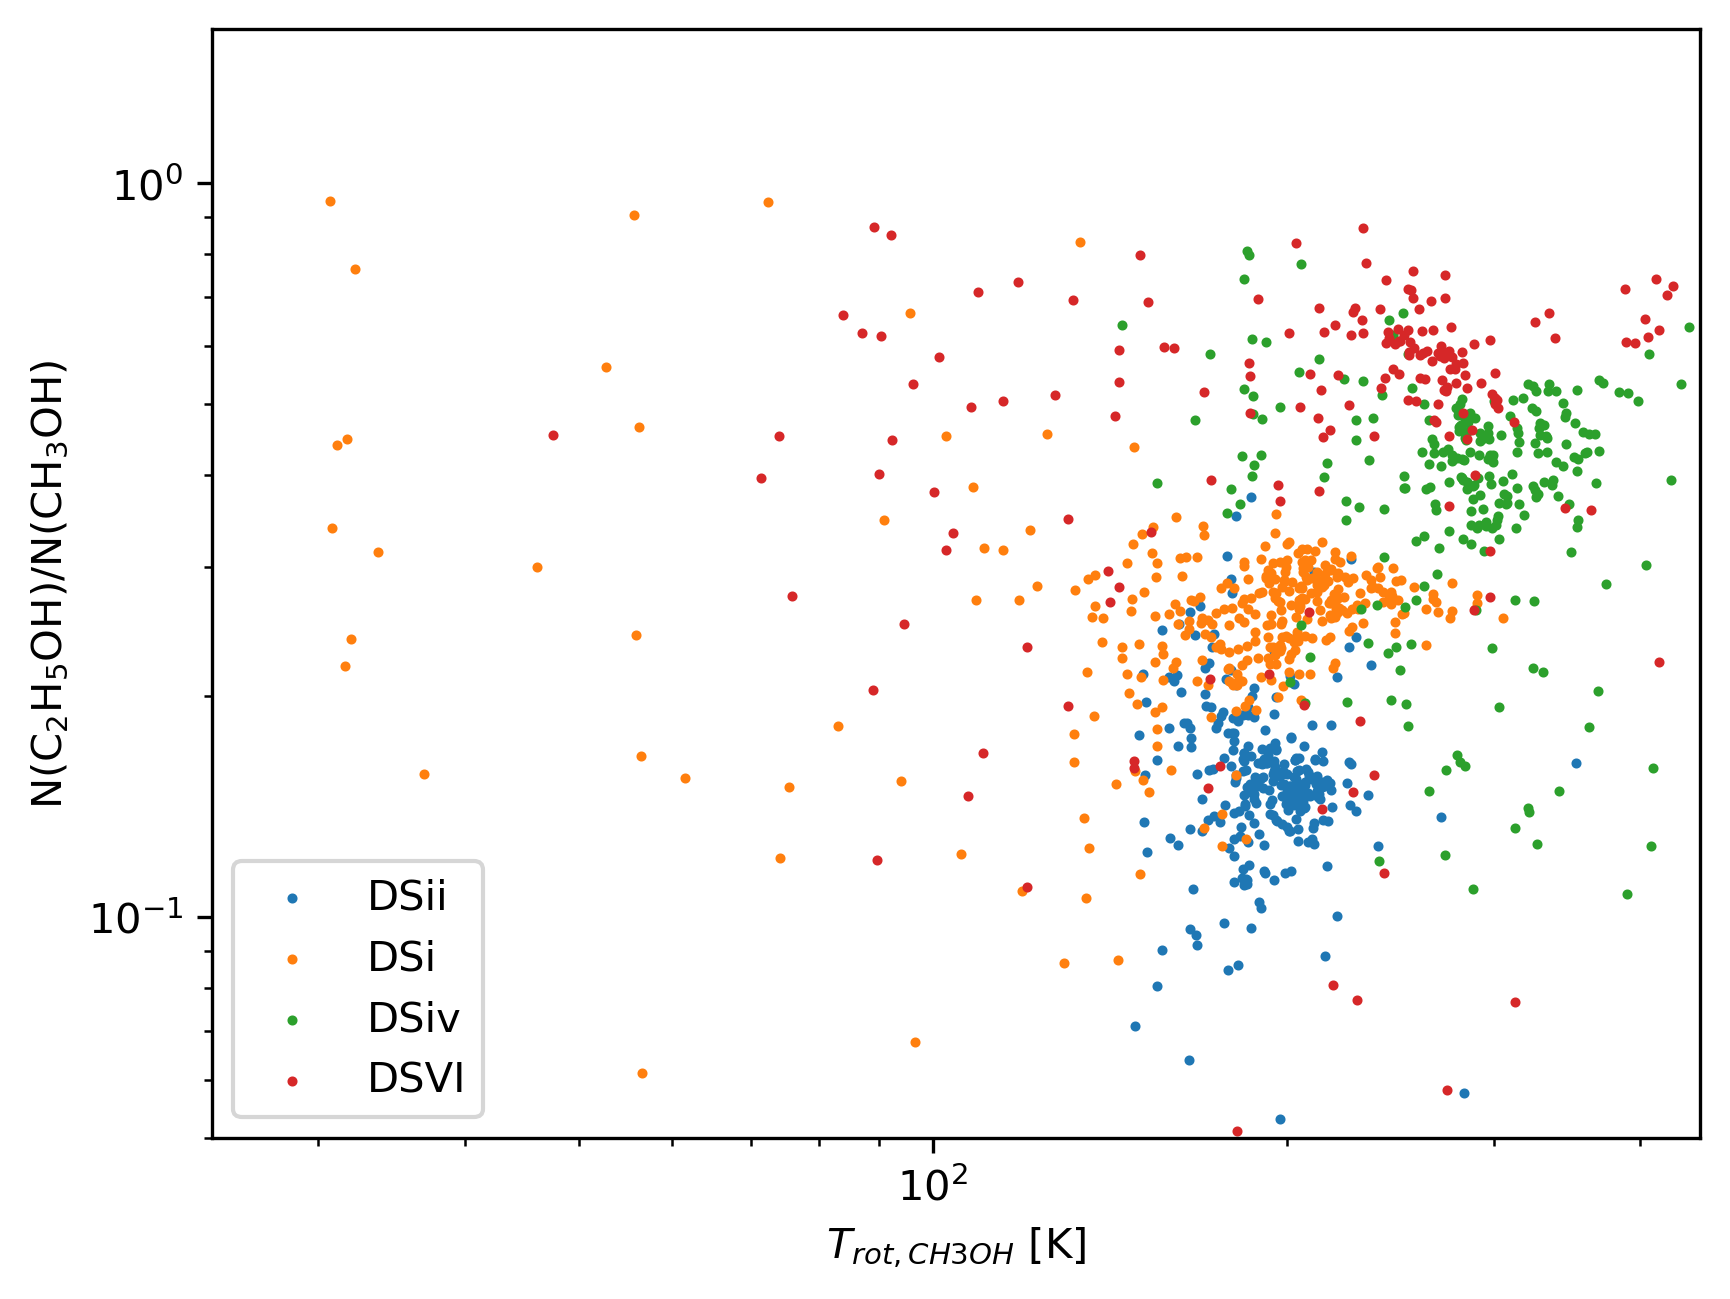

In [83]:
for source in sources:
    fnum=fields[source]
    center_pixel=pixdict[source]
    ch3oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/CH3OH/{source}{ch3oh_sourcedict[source]}'
    c2h5oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}{c2h5oh_sourcelocs[source]}'
    
    trot_ch3oh_path=ch3oh_directory+'bootstrap_texmap_3sigma_allspw_withnans_weighted.fits'
    ratio_path=c2h5oh_directory+'nc2h5oh_nch3oh_ratio_3sigma_lessthan1.fits'
    trot_ch3ohmap=np.squeeze(fits.getdata(trot_ch3oh_path))
    ratiomap=fits.getdata(ratio_path)
    
    usable_trot_ch3oh_pixels=(np.isfinite(trot_ch3ohmap)*np.isfinite(ratiomap))
    usable_trot_ch3ohmap=(trot_ch3ohmap*usable_trot_ch3oh_pixels)[(center_pixel[0]-5):(center_pixel[1]+5)]
    usable_ratiomap=ratiomap * (ratiomap > 0.01)
    plt.scatter(usable_trot_ch3ohmap,ratiomap[(center_pixel[0]-5):(center_pixel[1]+5)],s=2,label=source)
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=ratiocutoff)
plt.xlim(xmax=450)
plt.xlabel(r'$T_{rot,CH3OH}$ [K]')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)')
plt.legend()
plt.show()

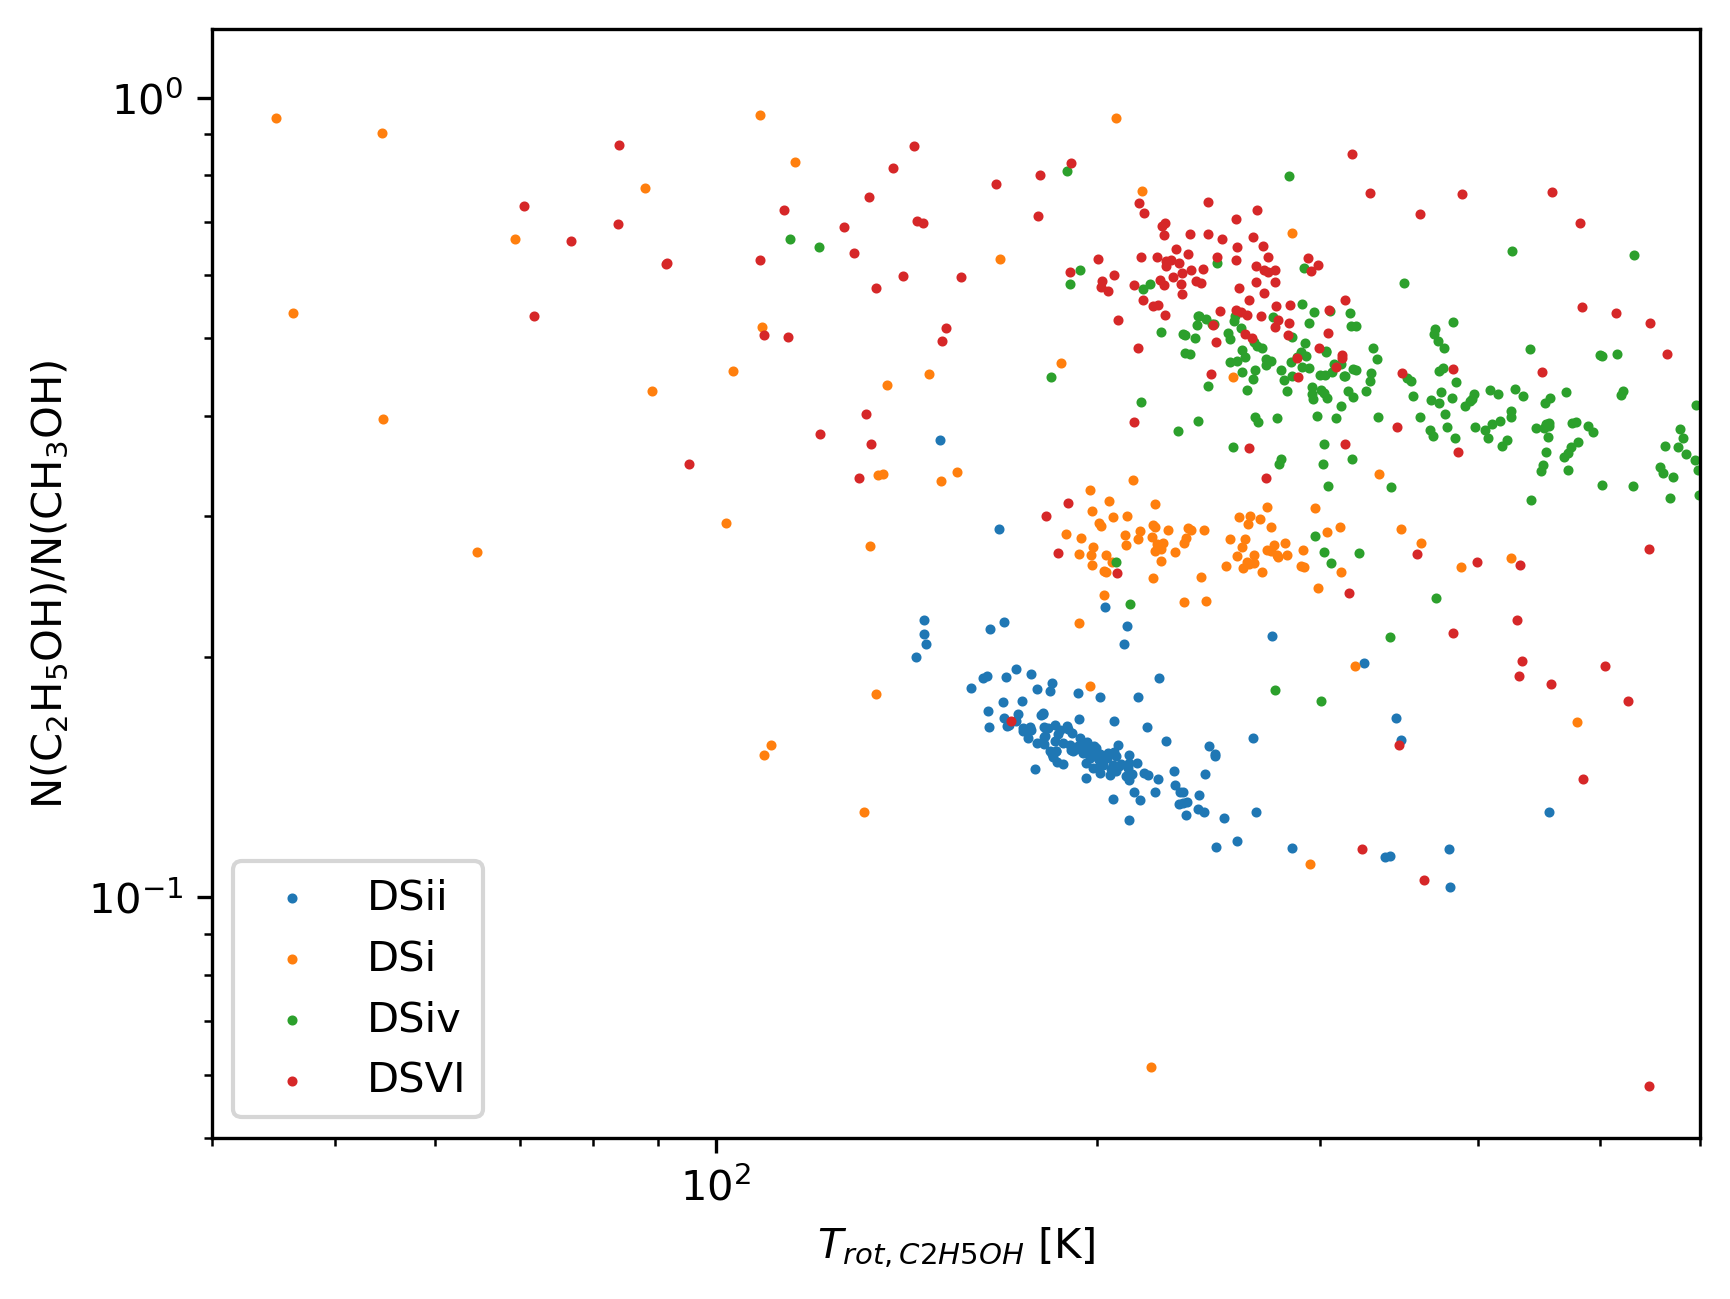

In [84]:
for source in sources:
    fnum=fields[source]
    center_pixel=pixdict[source]
    c2h5oh_directory=f'/blue/adamginsburg/d.jeff/SgrB2DSreorg/field{fnum}/C2H5OH/{source}{c2h5oh_sourcelocs[source]}'
    
    trot_c2h5oh_path=c2h5oh_directory+'texmap_3sigma_allspw_withnans_weighted.fits'
    ratio_path=c2h5oh_directory+'nc2h5oh_nch3oh_ratio_3sigma_lessthan1.fits'
    trot_c2h5ohmap=np.squeeze(fits.getdata(trot_c2h5oh_path))
    ratiomap=fits.getdata(ratio_path)
    
    usable_trot_c2h5oh_pixels=(np.isfinite(trot_c2h5ohmap)*np.isfinite(ratiomap))
    usable_trot_c2h5ohmap=(trot_c2h5ohmap*usable_trot_c2h5oh_pixels)[(center_pixel[0]-5):(center_pixel[1]+5)]
    usable_ratiomap=ratiomap * (ratiomap > 0.01)
    plt.scatter(usable_trot_c2h5ohmap,ratiomap[(center_pixel[0]-5):(center_pixel[1]+5)],s=2,label=source)
plt.xscale('log')
plt.yscale('log')
plt.ylim(ymin=ratiocutoff)
plt.xlim(xmin=40,xmax=600)
plt.xlabel(r'$T_{rot,C2H5OH}$ [K]')
plt.ylabel(r'N(C$_2$H$_5$OH)/N(CH$_3$OH)')
plt.legend()
plt.show()